### Extraer texto desde archivos PDF. OCR  

El reconocimiento óptico de caracteres (ROC), expresado con frecuencia con la sigla OCR (del inglés Optical Character Recognition), es un proceso dirigido a la digitalización de textos, los cuales identifican automáticamente a partir de una imagen símbolos o caracteres que pertenecen a un determinado alfabeto, para luego almacenarlos en forma de datos. Así podremos interactuar con estos mediante un programa de edición de texto o similar.

In [1]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (211 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.6 MB 20 kB/s 
     |████████████████████████████████| 47.6 MB 34 kB/s 


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw

In [4]:
reader = easyocr.Reader(['en'])

In [15]:
images = convert_from_path('/content/sample_data/Repositioning Ivermectin for Covid-19 treatment.pdf')
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7FBBEBEF9BD0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7FBBEC1DF4D0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBCFD2C3CD0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE58B90>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE58910>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE588D0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE58A10>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE58E50>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE58F90>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE58790>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE58F10>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FBBEBE

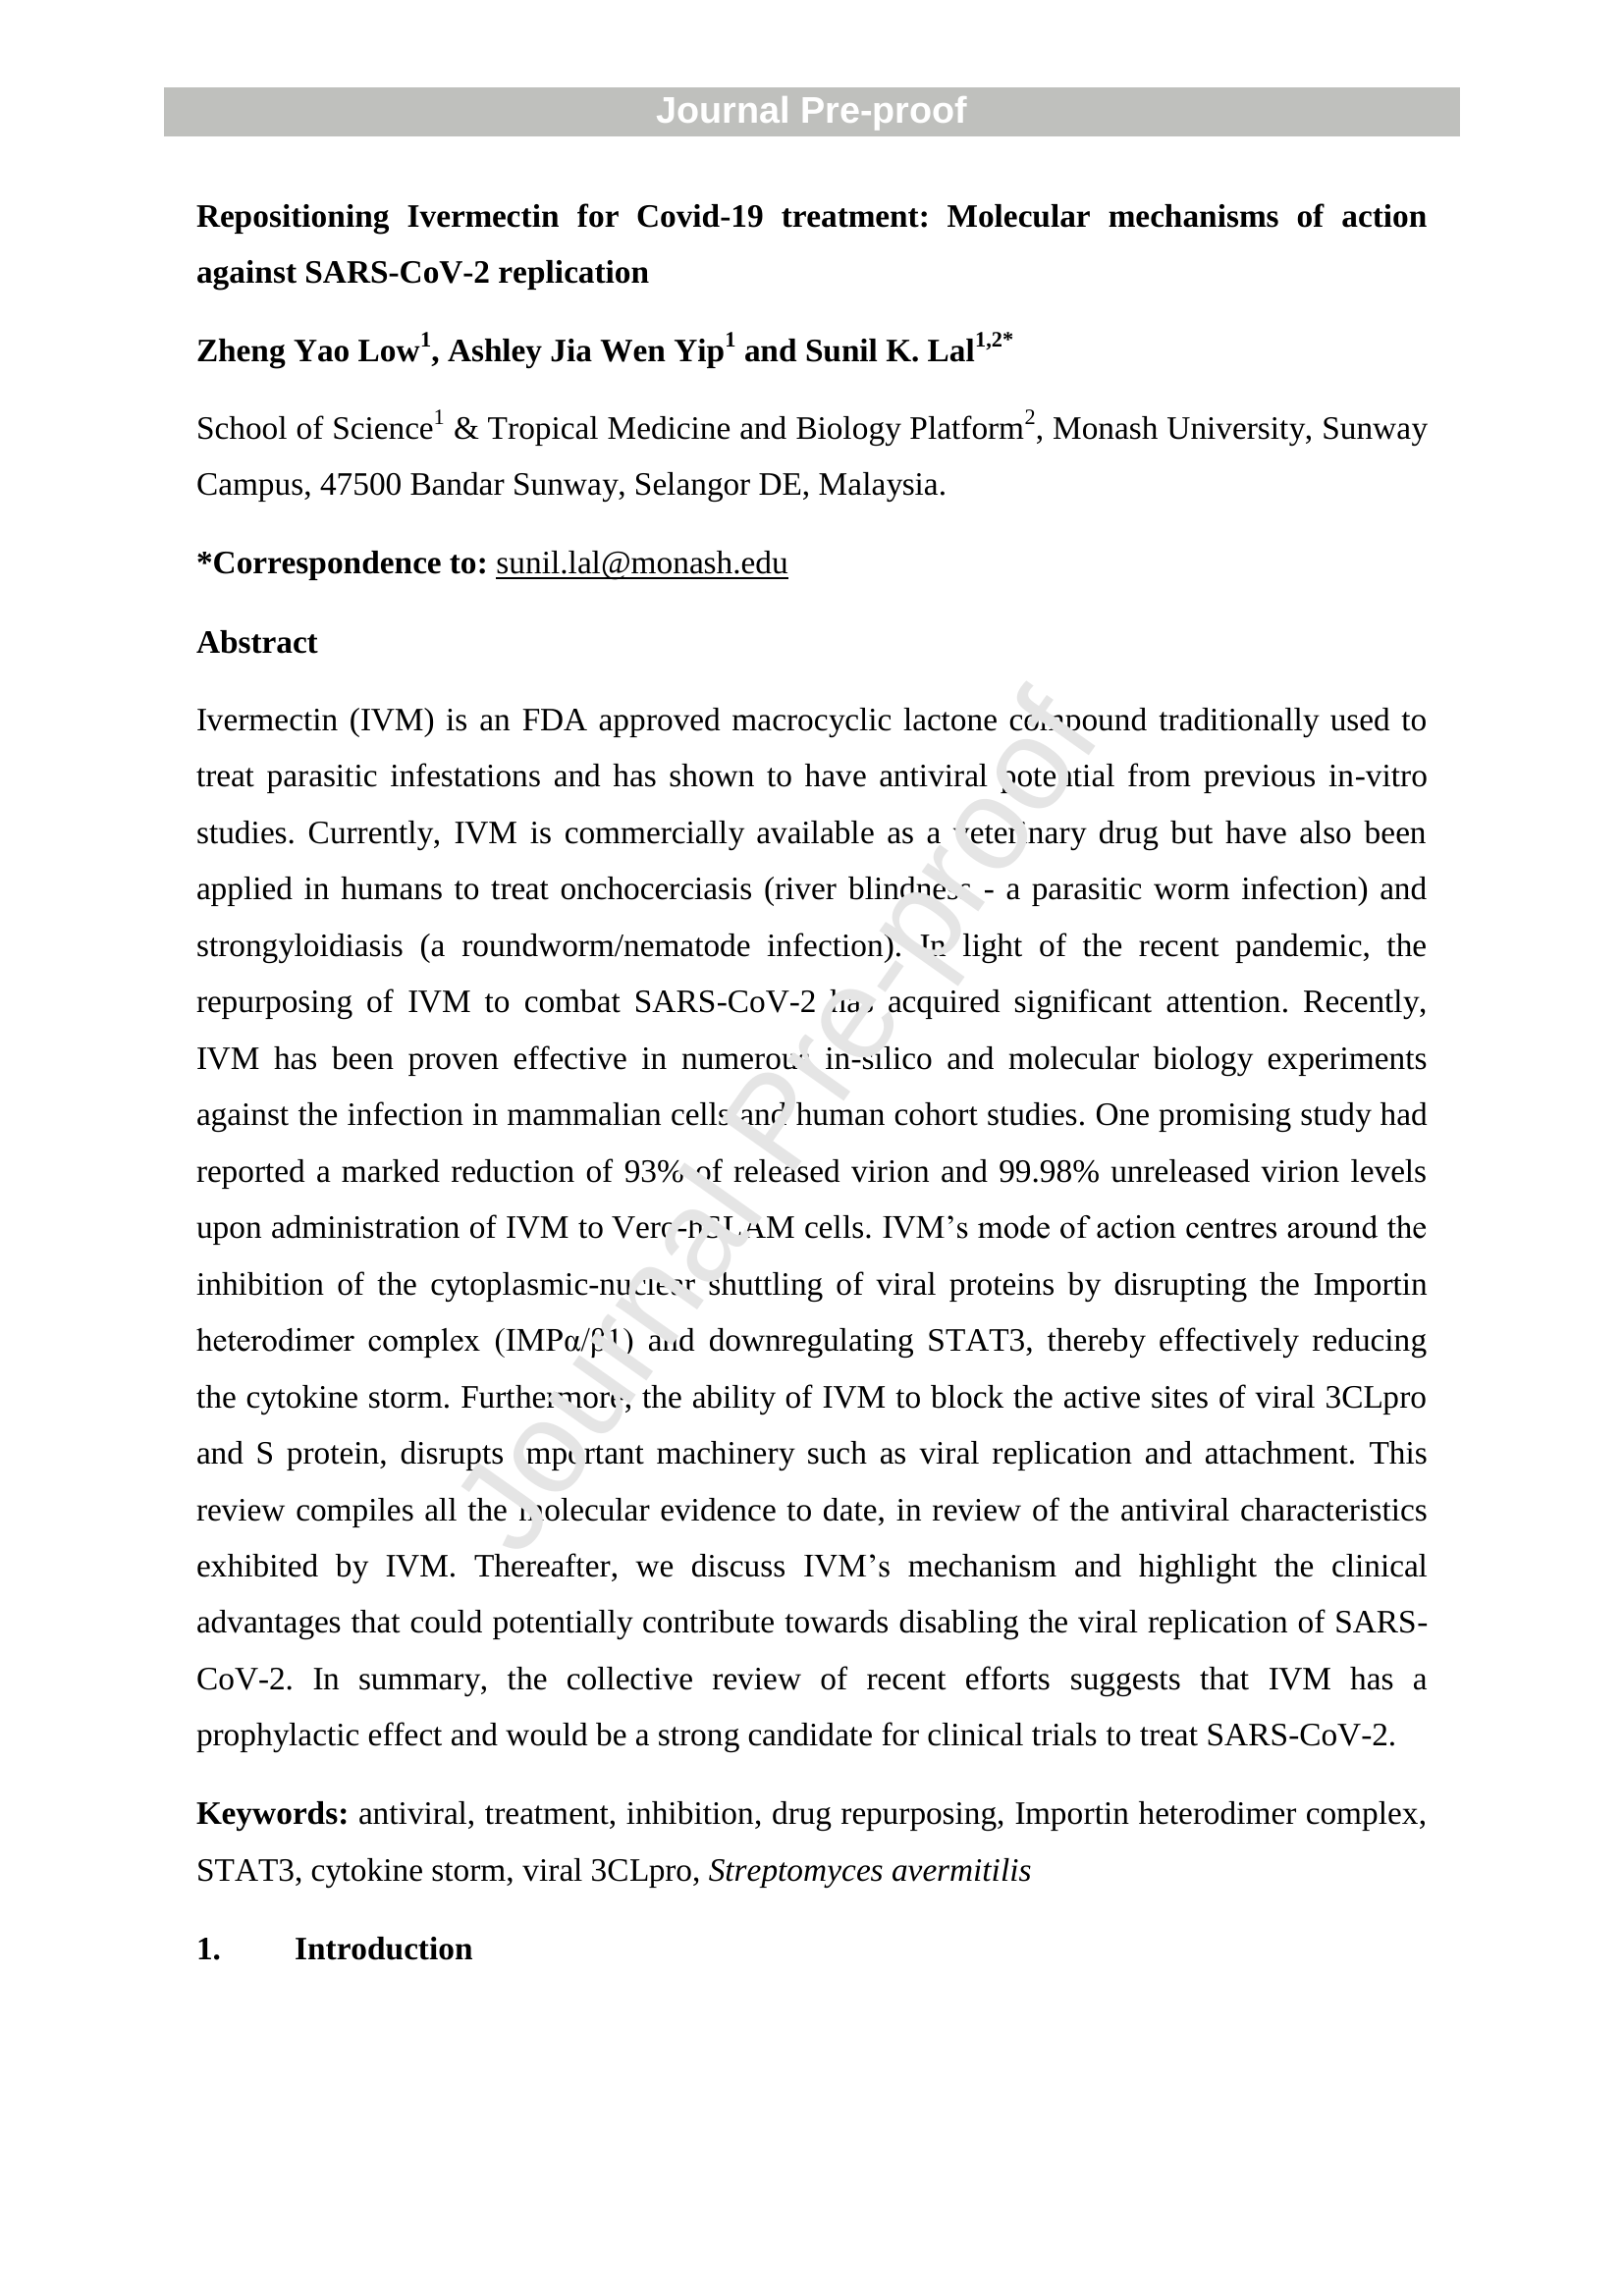

In [16]:
from IPython.display import display, Image
display(images[2])

In [18]:
bounds = reader.readtext(np.array(images[2]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch', beamWidth=10)
bounds

[([[663, 91], [992, 91], [992, 139], [663, 139]],
  'Journal Pre-proof',
  0.5778124172658662),
 ([[195, 201], [1459, 201], [1459, 245], [195, 245]],
  'Repositioning  Ivermectin   for Covid-19 treatment: Molecular mechanisms of  action',
  0.4329361302884029),
 ([[193, 255], [666, 255], [666, 304], [193, 304]],
  'against SARS-CoV-2 replication',
  0.773149779492699),
 ([[194, 328], [1043, 328], [1043, 383], [194, 383]],
  'Zheng Yao Low\', Ashley Jia Wen Yipl and Sunil K. Lall2"',
  0.6882113474999859),
 ([[196, 414], [1461, 414], [1461, 464], [196, 464]],
  'School of Science! & Tropical Medicine and Biology Platform?, Monash University, Sunway',
  0.68972461629562),
 ([[194, 473], [966, 473], [966, 521], [194, 521]],
  'Campus, 47500 Bandar Sunway, Selangor DE, Malaysia.',
  0.772897525077086),
 ([[197, 554], [809, 554], [809, 597], [197, 597]],
  '*Correspondence t0: sunil lal@monash edu',
  0.6781456786609049),
 ([[200, 639], [328, 639], [328, 671], [200, 671]],
  'Abstract',
  0

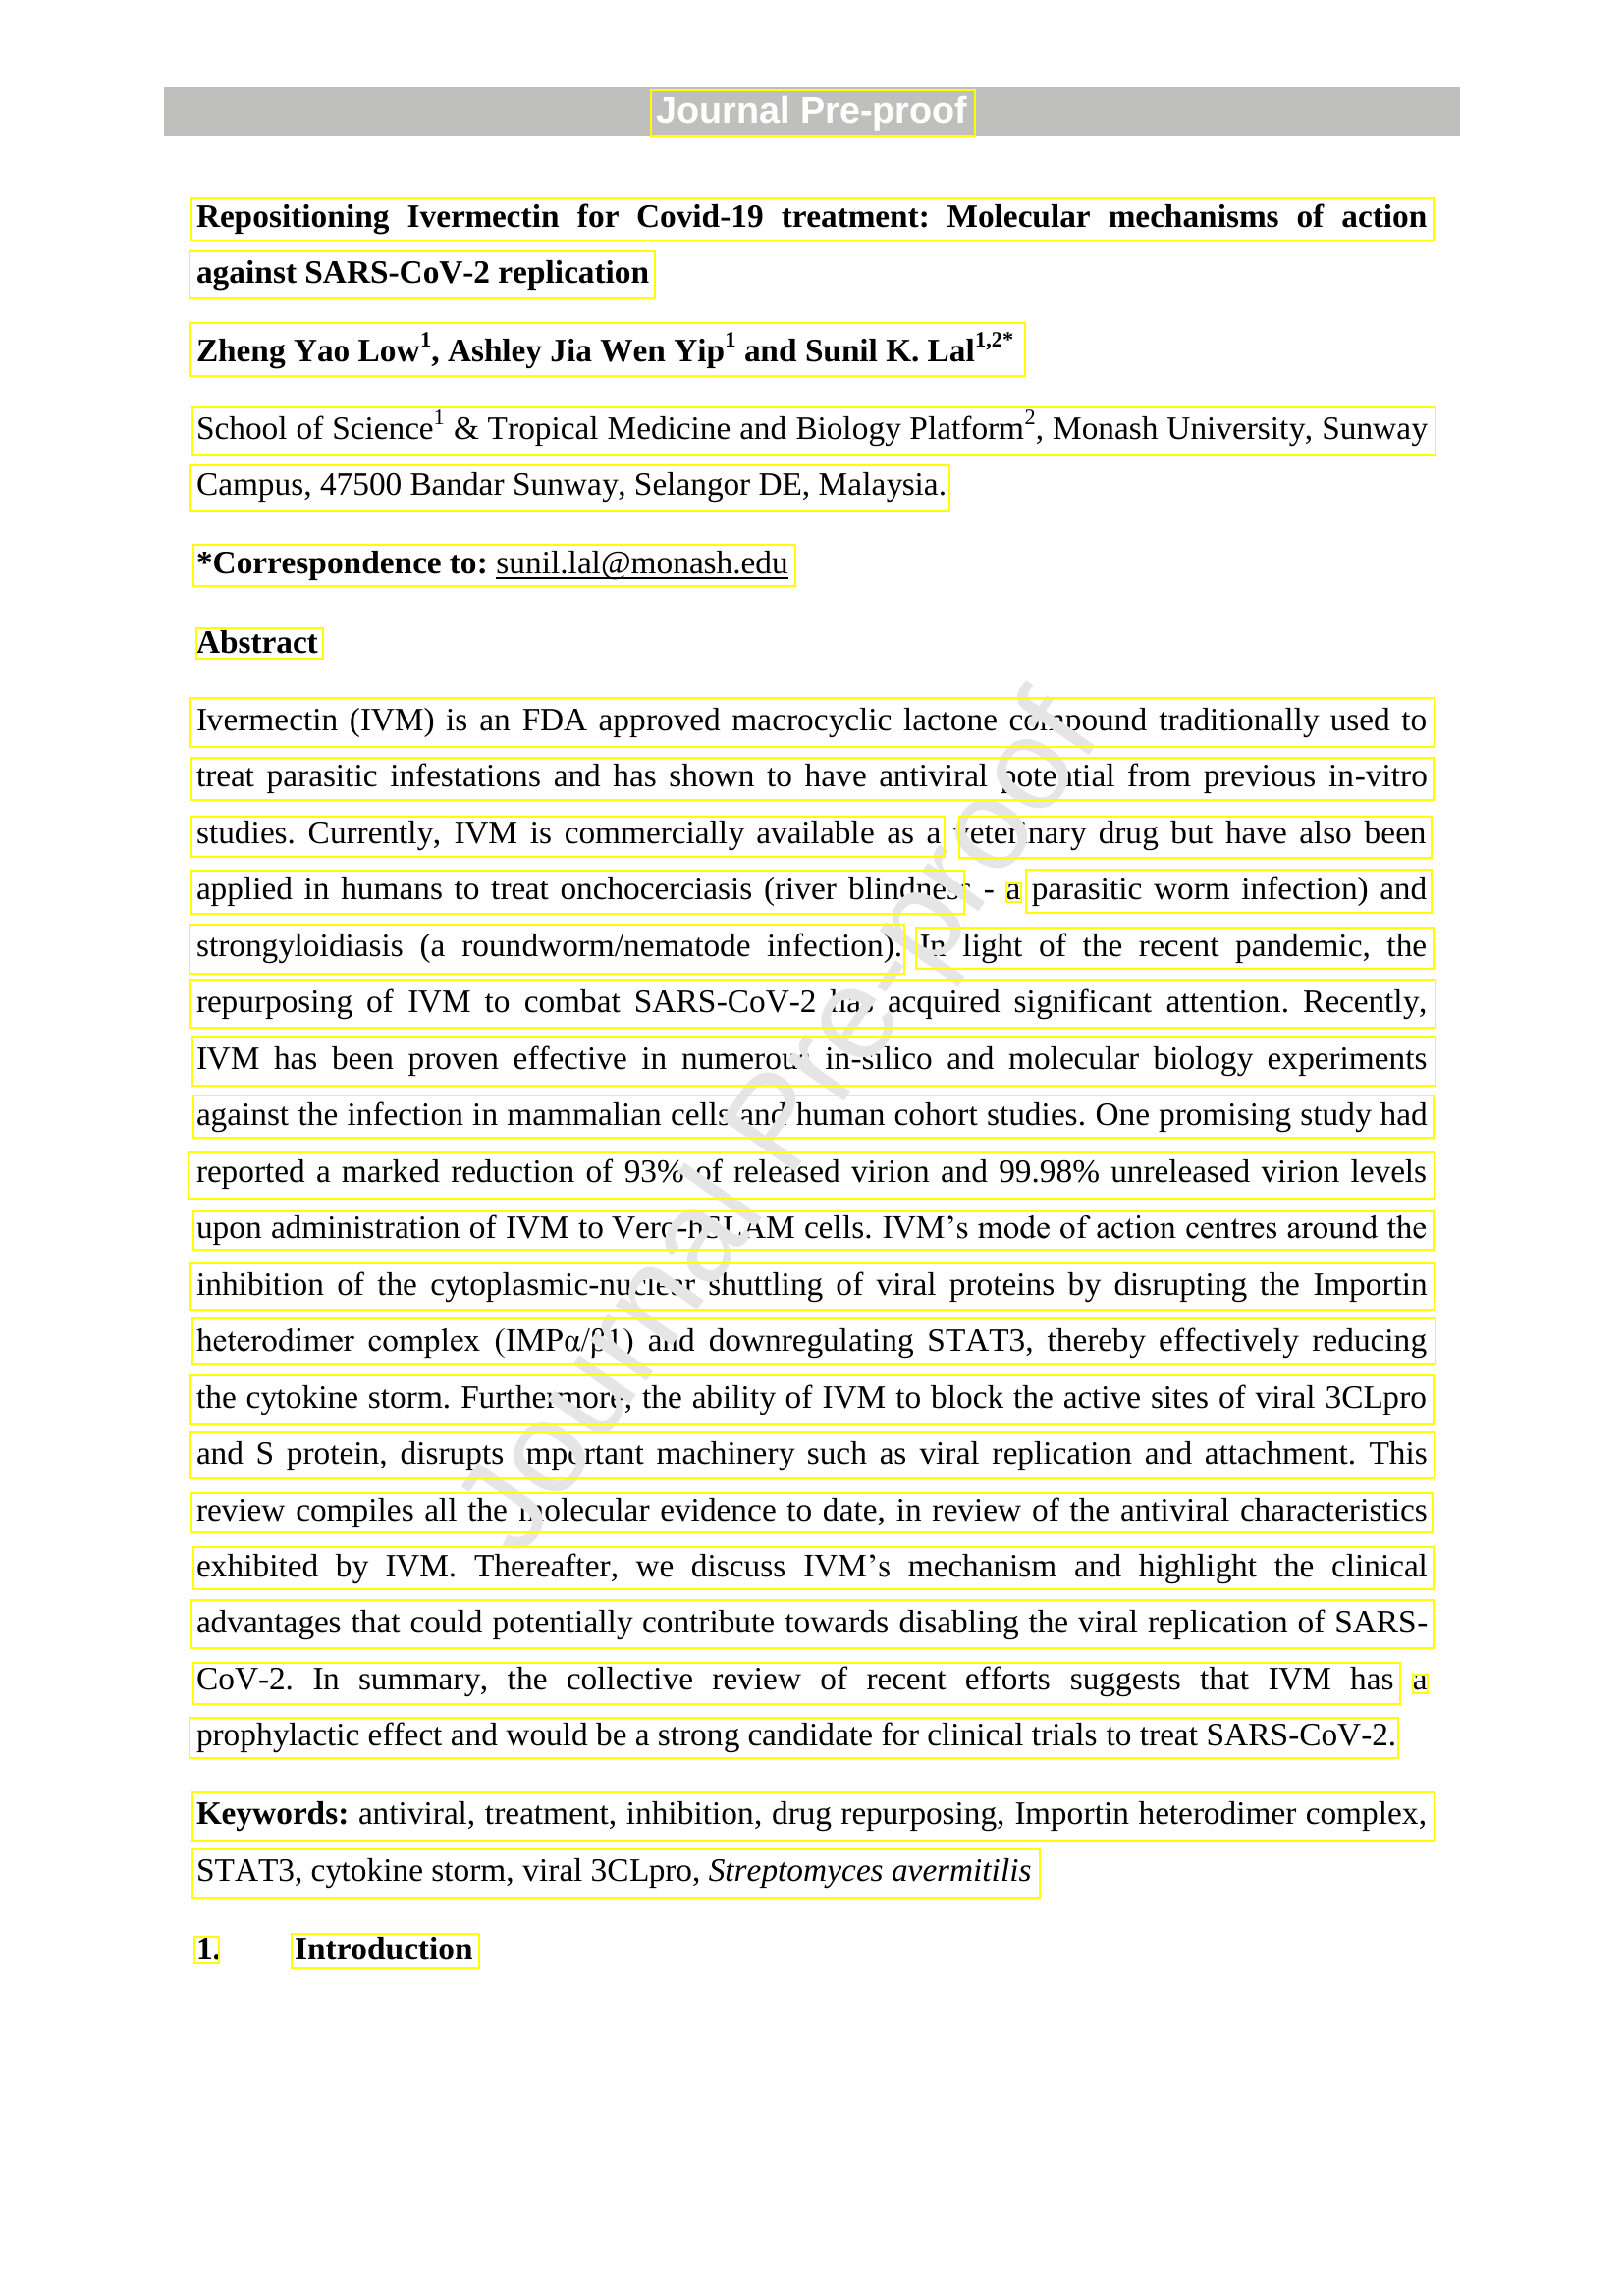

In [19]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image 

draw_boxes(images[2], bounds)  

In [20]:
bounds[1][1]

'Repositioning  Ivermectin   for Covid-19 treatment: Molecular mechanisms of  action'

In [21]:
text = ''
for i in range(len(bounds)):
  text = text + bounds[i][1] + '\n'

print(text)

Journal Pre-proof
Repositioning  Ivermectin   for Covid-19 treatment: Molecular mechanisms of  action
against SARS-CoV-2 replication
Zheng Yao Low', Ashley Jia Wen Yipl and Sunil K. Lall2"
School of Science! & Tropical Medicine and Biology Platform?, Monash University, Sunway
Campus, 47500 Bandar Sunway, Selangor DE, Malaysia.
*Correspondence t0: sunil lal@monash edu
Abstract
Ivermectin (IVM) is an FDA approved macrocyclic lactone co "ound traditionaly used to
treat parasitic infestations and has shown to have antiviral , te Itial from previous in-vitro
studies. Currently, IVM is commercially available as a
'ete nary drug but have also been
applied in humans to treat onchocerciasis (river blindne_
a
parasitic WOrm infection) and
strongyloidiasis (a roundworm/nematode infection)
Tr light of the recent pandemic, the
repurposing of IVM to combat SARS-CoV-2 'a , acquired significant attention: Recently,
IVM has been proven effective in numero' in-sllico and molecular biology experiments
ag

## BioBERT

In [22]:
import requests

In [28]:
def term_extraction(text, out, type):

  denotations=out['denotations']
  relavent_terms=[]

  if type=='drug':
    drug_terms=[]
    for i in denotations:
      if i['obj']== 'drug':
        drug_terms.append((i['span']['begin'],i['span']['end']))

    for i in drug_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])
  
  if type=='disease':
    disease_terms=[]
    for i in denotations:
      if i['obj']== 'disease':
        disease_terms.append((i['span']['begin'],i['span']['end']))

    for i in disease_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])
    
  if type=='species':
    species_terms=[]
    for i in denotations:
      if i['obj']== 'species':
        species_terms.append((i['span']['begin'],i['span']['end']))

    for i in species_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])

  if type=='gene':
    gene_terms=[]
    for i in denotations:
      if i['obj']== 'gene':
        gene_terms.append((i['span']['begin'],i['span']['end']))

    for i in gene_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])
  
  return(relavent_terms)

In [29]:
def query_raw(text, url="https://bern.korea.ac.kr/plain"):
  return requests.post(url, data={'sample_text': text}).json()

In [30]:
out = (query_raw(text))
print(out)
print(term_extraction(text, out, 'drug'))
print(term_extraction(text, out, 'disease'))
print(term_extraction(text, out, 'species'))
print(term_extraction(text, out, 'gene'))

{'project': 'BERN', 'sourcedb': '', 'sourceid': '8d017affe49d68138384cae4f4e3c5f76d9c4937e7677fc69c3261dd-Thread-6662658', 'text': 'Journal Pre-proof Repositioning  Ivermectin   for Covid-19 treatment: Molecular mechanisms of  action against SARS-CoV-2 replication Zheng Yao Low\', Ashley Jia Wen Yipl and Sunil K. Lall2" School of Science! & Tropical Medicine and Biology Platform?, Monash University, Sunway Campus, 47500 Bandar Sunway, Selangor DE, Malaysia. *Correspondence t0: sunil lal@monash edu Abstract Ivermectin (IVM) is an FDA approved macrocyclic lactone co "ound traditionaly used to treat parasitic infestations and has shown to have antiviral , te Itial from previous in-vitro studies. Currently, IVM is commercially available as a \'ete nary drug but have also been applied in humans to treat onchocerciasis (river blindne_ a parasitic WOrm infection) and strongyloidiasis (a roundworm/nematode infection) Tr light of the recent pandemic, the repurposing of IVM to combat SARS-CoV-2 